<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#项目介绍" data-toc-modified-id="项目介绍-1">项目介绍</a></span></li><li><span><a href="#哪些类别比较畅销?" data-toc-modified-id="哪些类别比较畅销?-2">哪些类别比较畅销?</a></span></li><li><span><a href="#哪些商品比较畅销?" data-toc-modified-id="哪些商品比较畅销?-3">哪些商品比较畅销?</a></span></li><li><span><a href="#不同门店的销售额占比" data-toc-modified-id="不同门店的销售额占比-4">不同门店的销售额占比</a></span></li><li><span><a href="#哪个时间段是超市的客流高封期?" data-toc-modified-id="哪个时间段是超市的客流高封期?-5">哪个时间段是超市的客流高封期?</a></span></li></ul></div>

### 项目介绍
近些年来，国内大型连锁超市如雨后春笋般迸发，对于各个超市来说，竞争压力不可谓
不大，为了拓展、保留客户，各种促销手段应运而生。

以下为国内某连锁超市的成交统计数据，针对于该数据，挖掘其中价值，为该超市的促销手段提供技术支持。

In [1]:
import pandas as pd
from datetime import datetime

# 导入数据源，parse_dates：将时间字符串转为日期时间格式
data=pd.read_csv("order-14.3.csv",parse_dates=["成交时间"],encoding='gbk')
print(data.shape)
data.head()
data

(3478, 7)


商品ID       类别ID  门店编号     单价     销量                成交时间  \
0     30006206  915000003  CDNL  25.23  0.328 2017-01-03 09:56:00   
1     30163281  914010000  CDNL   2.00  2.000 2017-01-03 09:56:00   
2     30200518  922000000  CDNL  19.62  0.230 2017-01-03 09:56:00   
3     29989105  922000000  CDNL   2.80  2.044 2017-01-03 09:56:00   
4     30179558  915000100  CDNL  47.41  0.226 2017-01-03 09:56:00   
...        ...        ...   ...    ...    ...                 ...   
3473  30031870  915030401  CDXL   6.58  0.862 2017-01-03 10:59:00   
3474  30008276  911010501  CDXL  15.42  0.481 2017-01-03 11:00:00   
3475  30033854  910000000  CDXL   9.62  1.000 2017-01-03 11:17:00   
3476  30206214  910000000  CDXL  15.62  1.000 2017-01-03 11:40:00   
3477  30129510  925090000  CDXL  23.21  0.312 2017-01-03 11:50:00   

                          订单ID  
0     20170103CDLG000210052759  
1     20170103CDLG000210052759  
2     20170103CDLG000210052759  
3     20170103CDLG000210052759  
4     20170103CDLG000210052759  
...                        ...  
3473  20170103CDLG000510025147  
3474  20170103CDLG000510025148  
3475  20170103CDLG000510025149  
3476  20170103CDLG000510025150  
3477  20170103CDLG000510025151  

[3478 rows x 7 columns]

### 哪些类别比较畅销?

In [2]:
# ascending=False 降序
data.groupby("类别ID")["销量"].sum().reset_index().sort_values(by="销量",ascending=False).head(10)

类别ID       销量
240  922000003  425.328
239  922000002  206.424
251  923000006  190.294
216  915030104  175.059
238  922000001  121.355
367  960000000  121.000
234  920090000  111.565
249  923000002   91.847
237  922000000   86.395
247  923000000   85.845

### 哪些商品比较畅销?

In [3]:
pd.pivot_table(data,index="商品ID",values="销量",aggfunc="sum").reset_index().sort_values(by="销量",ascending=False).head(10)

商品ID       销量
8    29989059  391.549
18   29989072  102.876
469  30022232  101.000
523  30031960   99.998
57   29989157   72.453
476  30023041   64.416
505  30026255   62.375
7    29989058   56.052
510  30027007   48.757
903  30171264   45.000

### 不同门店的销售额占比

In [4]:
data["销售额"]=data["销量"]*data["单价"]
# 不同门店销售
print(data.groupby("门店编号")["销售额"].sum())
# 不同门店销售额占比
dfbb = data.groupby("门店编号")[["销售额"]].sum()/data["销售额"].sum()
dfbb.rename(columns={'销售额':'销售额占比'},inplace=True)
dfbb

门店编号
CDLG    10908.82612
CDNL     8059.47867
CDXL     9981.76166
Name: 销售额, dtype: float64


销售额占比
门店编号          
CDLG  0.376815
CDNL  0.278392
CDXL  0.344792

<AxesSubplot: ylabel='销售额'>

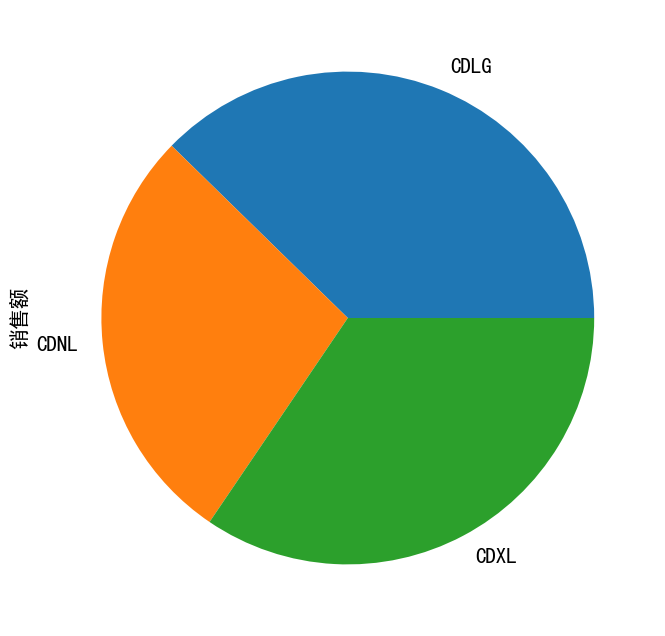

In [5]:
import matplotlib as plt

plt.rcParams['figure.figsize'] = (16.0, 8.0) # 设置figure_size尺寸
plt.rcParams['font.sans-serif']=['SimHei']    # 用来设置字体样式以正常显示中文标签
plt.rcParams['axes.unicode_minus']=False    # 默认是使用Unicode负号，设置正常显示字符，如正常显示负号
plt.rcParams['font.size'] = 15

(data.groupby("门店编号")["销售额"].sum()/data["销售额"].sum()).plot.pie()

### 哪个时间段是超市的客流高峰封期?

<AxesSubplot: xlabel='小时'>

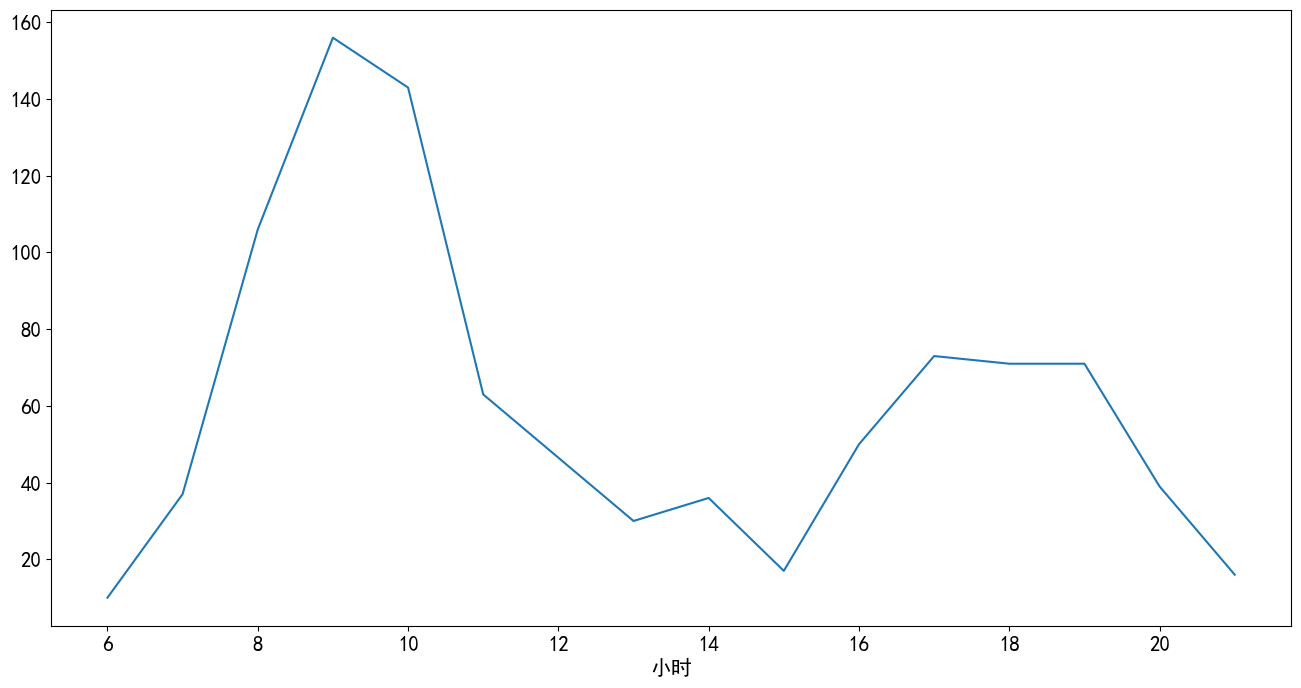

In [6]:
# 利用自定义时间格式函数strftime提取小时数
data["小时"]=data["成交时间"].map(lambda x:int(x.strftime("%H")))
# 对小时和订单去重
traffic=data[["小时","订单ID"]].drop_duplicates()
# 求每小时的客流量
traffic.groupby("小时")["订单ID"].count().plot()